# Convolving images

Example from mourafiq's blog: http://mourafiq.com/2016/08/10/playing-with-convolutions-in-tensorflow.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import tensorflow as tf
from PIL import Image
import numpy

/Users/kch31/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


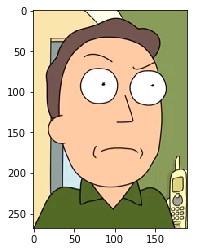

In [4]:
img = Image.open('characters/jerry.png')
plt.imshow(img)
plt.show()

In [5]:
def show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.show()
 
 
def show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    gs1 = gridspec.GridSpec(1, 5)
    plt.subplot(gs1[0, 0]); plt.axis('off'); plt.imshow(img[:, :, :])
    plt.subplot(gs1[0, 1]); plt.axis('off'); plt.imshow(conv_op[0, :, :, :])
    plt.subplot(gs1[0, 2]); plt.axis('off'); plt.imshow(sigmoid_op[0, :, :, :])
    plt.subplot(gs1[0, 3]); plt.axis('off'); plt.imshow(avg_pool_op[0, :, :, :])
    plt.subplot(gs1[0, 4]); plt.axis('off'); plt.imshow(max_pool_op[0, :, :, :])
    plt.show()

def show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op):
    print("""
     image filters (shape {})
     conv_op filters (shape {})
     sigmoid_op filters (shape {})
     avg_pool_op filters (shape {})
     max_pool_op filters (shape {})
     """.format(
         img.shape, conv_op.shape, sigmoid_op.shape, avg_pool_op.shape, max_pool_op.shape))

In [7]:
def convolve(img, kernel, strides=[1, 3, 3, 1], pooling=[1, 3, 3, 1], padding='SAME', rgb=True):
    with tf.Graph().as_default():
        num_maps = 3
        if not rgb:
            num_maps = 1  # set number of maps to 1
            img = img.convert('L', (0.2989, 0.5870, 0.1140, 0))  # convert to gray scale


    # reshape image to have a leading 1 dimension
    img = numpy.asarray(img, dtype='float32') / 256.
    img_shape = img.shape
    img_reshaped = img.reshape(1, img_shape[0], img_shape[1], num_maps)

    x = tf.placeholder('float32', [1, None, None, num_maps])
    w = tf.get_variable('w', initializer=tf.to_float(kernel))

     # operations
    conv = tf.nn.conv2d(x, w, strides=strides, padding=padding)
    sig = tf.sigmoid(conv)
    max_pool = tf.nn.max_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)
    avg_pool = tf.nn.avg_pool(sig, ksize=[1, 3, 3, 1], strides=[1, 3, 3, 1], padding=padding)

    init = tf.initialize_all_variables()
    with tf.Session() as session:
        session.run(init)
        conv_op, sigmoid_op, avg_pool_op, max_pool_op = session.run([conv, sig, avg_pool, max_pool],
                                                                     feed_dict={x: img_reshaped})

    show_shapes(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
    if rgb:
        show_image_ops_rgb(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)
    else:
        show_image_ops_gray(img, conv_op, sigmoid_op, avg_pool_op, max_pool_op)

Instructions for updating:
Use `tf.global_variables_initializer` instead.

     image filters (shape (268, 189))
     conv_op filters (shape (1, 90, 63, 1))
     sigmoid_op filters (shape (1, 90, 63, 1))
     avg_pool_op filters (shape (1, 30, 21, 1))
     max_pool_op filters (shape (1, 30, 21, 1))
     


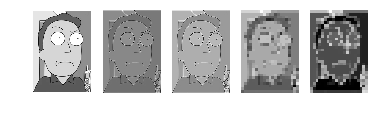

In [8]:
a = np.zeros([3, 3, 1, 1])
a[1, 1, :, :] = 5
a[0, 1, :, :] = -1
a[1, 0, :, :] = -1
a[2, 1, :, :] = -1
a[1, 2, :, :] = -1
convolve(img, a, rgb=False)

In [10]:
b = np.zeros([3, 3, 1, 1])
b[1, 1, :, :] = 0.25
b[0, 1, :, :] = 0.125
b[1, 0, :, :] = 0.125
b[2, 1, :, :] = 0.125
b[1, 2, :, :] = 0.125
b[0, 0, :, :] = 0.0625
b[0, 2, :, :] = 0.0625
b[2, 0, :, :] = 0.0625
b[2, 2, :, :] = 0.0625
convolve(img, a, rgb=False)

ValueError: Variable w already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "<ipython-input-7-48db5ade7964>", line 15, in convolve
    w = tf.get_variable('w', initializer=tf.to_float(kernel))
  File "<ipython-input-8-5f28525ce6d6>", line 7, in <module>
    convolve(img, a, rgb=False)
  File "/Users/kch31/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
